# D.딥러닝_아이리스 데이터셋

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import backend as K 

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

#seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv('../data/iris.csv', header=None)
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]
print(df.head())
print(df.info())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


### train, test으로 나누어보세요(test20%)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [67]:
e = LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)
print(y_train)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1.

In [68]:
model = Sequential()
model.add(Dense(20, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                100       
                                                                 
 dense_25 (Dense)            (None, 3)                 63        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


### 딥러닝 모델 업데이트, 베스트 모델 저장, 학습 자동 중단

In [69]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)  
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only = True)

early_stopping_callback = EarlyStopping(monitor='val_loss',patience=3)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, 
                    batch_size=20, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.37960, saving model to ./model\01-0.3796.hdf5

Epoch 2: val_loss improved from 0.37960 to 0.36180, saving model to ./model\02-0.3618.hdf5

Epoch 3: val_loss improved from 0.36180 to 0.34510, saving model to ./model\03-0.3451.hdf5

Epoch 4: val_loss improved from 0.34510 to 0.33068, saving model to ./model\04-0.3307.hdf5

Epoch 5: val_loss improved from 0.33068 to 0.31822, saving model to ./model\05-0.3182.hdf5

Epoch 6: val_loss improved from 0.31822 to 0.30726, saving model to ./model\06-0.3073.hdf5

Epoch 7: val_loss improved from 0.30726 to 0.29756, saving model to ./model\07-0.2976.hdf5

Epoch 8: val_loss improved from 0.29756 to 0.28878, saving model to ./model\08-0.2888.hdf5

Epoch 9: val_loss improved from 0.28878 to 0.28074, saving model to ./model\09-0.2807.hdf5

Epoch 10: val_loss improved from 0.28074 to 0.27319, saving model to ./model\10-0.2732.hdf5

Epoch 11: val_loss improved from 0.27319 to 0.26608, saving model to ./model\11-0.


Epoch 93: val_loss improved from 0.10222 to 0.09986, saving model to ./model\93-0.0999.hdf5

Epoch 94: val_loss improved from 0.09986 to 0.09865, saving model to ./model\94-0.0987.hdf5

Epoch 95: val_loss did not improve from 0.09865

Epoch 96: val_loss improved from 0.09865 to 0.09853, saving model to ./model\96-0.0985.hdf5

Epoch 97: val_loss improved from 0.09853 to 0.09792, saving model to ./model\97-0.0979.hdf5

Epoch 98: val_loss improved from 0.09792 to 0.09774, saving model to ./model\98-0.0977.hdf5

Epoch 99: val_loss improved from 0.09774 to 0.09680, saving model to ./model\99-0.0968.hdf5

Epoch 100: val_loss improved from 0.09680 to 0.09460, saving model to ./model\100-0.0946.hdf5

Epoch 101: val_loss improved from 0.09460 to 0.09365, saving model to ./model\101-0.0936.hdf5

Epoch 102: val_loss improved from 0.09365 to 0.09340, saving model to ./model\102-0.0934.hdf5

Epoch 103: val_loss improved from 0.09340 to 0.09223, saving model to ./model\103-0.0922.hdf5

Epoch 104: v

### 그래프로 확인해보세요

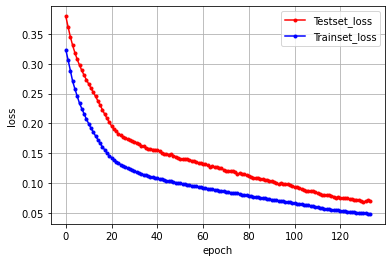

In [70]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']


x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 아이리스 품종 예측

In [72]:
X_test = np.array([[5.1, 3.5, 1.4, 0.4 ]])
y_predict = model.predict(X_test).flatten()

pred = np.argmax(y_predict)
print(e.inverse_transform([pred]))

X_test = np.array([[7.2, 2.6, 6.7, 2 ]])
y_predict = model.predict(X_test).flatten()

pred = np.argmax(y_predict)
print(e.inverse_transform([pred]))

['Iris-setosa']
['Iris-virginica']
